In [1]:
import os.path as osp
import os

import pandas as pd
import numpy as np

import seaborn as sb
from matplotlib import pyplot as plt

In [2]:
sb.set_theme(context='paper', style='white', font_scale=1.5, palette=None)

In [108]:
explainer = 'ig'
graph = 'ws'

## TPR / TNR

In [130]:
data = []
for model in ['vgae', 'gcn', 'gin', 'sage']:
    seed = 0
    path = f"../outputs/{graph}/{model}/{explainer}/"
    for filename in os.listdir(path):
        if not filename.startswith('.') and not filename in ['old', 'masks']:
            if filename.split('_')[-3] == 'inner':
                df = pd.read_csv(osp.join(path, filename), index_col=0)
                df['model'] = model.upper()
                data.append(df)

In [131]:
data = pd.concat(data)

In [132]:
data.shape

(6877, 17)

In [133]:
model_perfomance = (data[['test_auc', 'model', 'seed']]
 .groupby(['model', 'seed'])
 .apply(lambda x: x.iloc[0])
 .test_auc
 .unstack('model')
)

In [134]:
model_perfomance

model,GCN,GIN,SAGE,VGAE
seed,,,,
0,0.9393,0.76910,0.82805,0.9262
1,0.8610,0.75340,0.79525,0.9379
2,0.9533,0.77030,0.82895,0.9782
3,0.9272,0.81640,0.84745,0.9860
4,0.9122,0.79040,0.80875,0.9690
5,0.9298,0.70745,0.80445,0.9673
6,0.9015,0.76380,0.77280,0.9289
7,0.9406,0.73870,0.81855,0.9734
8,0.9116,0.78490,0.82870,0.9813


In [135]:
if graph == 'ws':
    data = data[(data.source_node-data.target_node).abs()<(data.k/2+1)].copy()
if graph == 'sbm':
    data = data[(data.source_block_label==data.target_block_label)].copy()

In [136]:
data.groupby(['seed', 'model']).size()

seed  model
0     GCN      100
      GIN      100
      SAGE      86
      VGAE     100
1     GCN       99
      GIN       99
      SAGE      82
      VGAE      99
2     GCN      100
      GIN      100
      SAGE      84
      VGAE     100
3     GCN      100
      GIN      100
      SAGE      88
      VGAE     100
4     GCN      100
      GIN      100
      SAGE      91
      VGAE     100
5     GCN      100
      GIN      100
      SAGE      92
      VGAE     100
6     GCN      100
      GIN      100
      SAGE      91
      VGAE     100
7     GCN       99
      GIN       99
      SAGE      91
      VGAE      99
8     GCN      100
      GIN      100
      SAGE      92
      VGAE     100
9     GCN      100
      GIN      100
      SAGE      80
      VGAE     100
dtype: int64

In [137]:
tpr = data[['tpr', 'model']].copy()
tpr.columns = ['value', 'model']
tpr['metric'] = 'sensitivity'
tnr = data[['tnr', 'model']].copy()
tnr.columns = ['value', 'model']
tnr['metric'] = 'specificity'
sb_data = pd.concat([tpr, tnr])

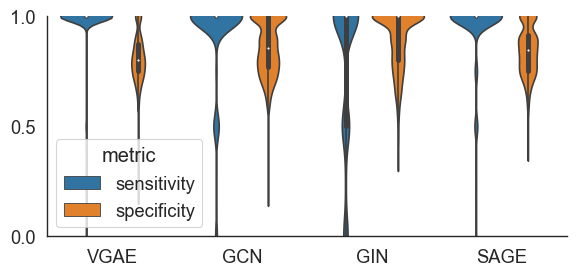

In [138]:
fig, ax = plt.subplots(figsize=(6, 3))
sb.violinplot(sb_data, x='model', y='value', hue='metric', inner='box', split=False)
ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1.])
ax.set_xlabel(None)
ax.set_ylabel(None)
sb.despine()
plt.tight_layout()
plt.savefig(f'../paper/figs/{graph}_model_comparison_tpr_tnr_{explainer}.png')

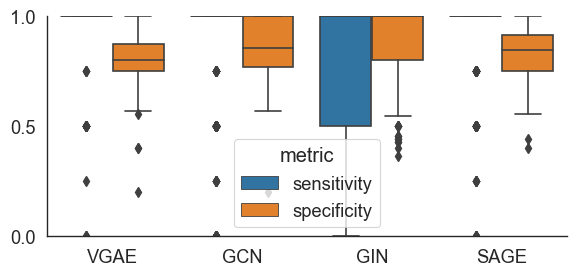

In [139]:
fig, ax = plt.subplots(figsize=(6, 3))
sb.boxplot(sb_data, x='model', y='value', hue='metric')
ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1.])
ax.set_xlabel(None)
ax.set_ylabel(None)
sb.despine()
plt.tight_layout()
plt.savefig(f'../paper/figs/{graph}_model_comparison_tpr_tnr_{explainer}.png')

In [128]:
data.groupby('model').tpr.describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
GCN,998.0,0.918587,0.219585,0.0,1.0,1.0,1.0,1.0
GIN,998.0,0.773297,0.346057,0.0,0.5,1.0,1.0,1.0
SAGE,431.0,0.943155,0.179517,0.0,1.0,1.0,1.0,1.0
VGAE,998.0,0.985220,0.095508,0.0,1.0,1.0,1.0,1.0


In [129]:
data.groupby('model').tnr.describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
GCN,998.0,0.861429,0.121294,0.200000,0.769231,0.857143,1.000000,1.0
GIN,998.0,0.896886,0.132316,0.363636,0.800000,1.000000,1.000000,1.0
SAGE,431.0,0.836279,0.113764,0.444444,0.750000,0.833333,0.916667,1.0
VGAE,998.0,0.808211,0.103618,0.200000,0.750000,0.800000,0.875000,1.0


## Inner product / Cosine similarity

In [97]:
data = []
model = 'vgae'
explainer = 'ig'
graph = 'sbm'
path = f"../outputs/{graph}/{model}/{explainer}/"
for filename in os.listdir(path):
    if not filename.startswith('.') and not filename in ['old', 'masks']:
        df = pd.read_csv(osp.join(path, filename), index_col=0)
        df['model'] = model.upper()
        if filename.split('_')[-3] == 'cosine':
            df['decoder'] = 'Cosine'
            data.append(df)
        elif filename.split('_')[-3] == 'inner':
            df['decoder'] = 'Inner product'
            data.append(df)

In [98]:
data = pd.concat(data)

In [99]:
data.shape

(7026, 19)

In [100]:
data.head()

,idx,target,pred,source_node,target_node,tpr,tnr,binary_threshold,source_block_label,target_block_label,seed,graph,n_blocks,avg_block_size,diag_mu,test_auc,model,explainer,decoder
0,0,1.0,0.629726,63,88,0.731682,0.958641,0.0,1,1,2,sbm,3,50,0.8,0.981735,VGAE,ig,Inner product
1,1,1.0,0.629140,53,87,0.767802,0.954352,0.0,1,1,2,sbm,3,50,0.8,0.981735,VGAE,ig,Inner product
2,2,1.0,0.616277,0,65,1.000000,0.707212,0.0,0,1,2,sbm,3,50,0.8,0.981735,VGAE,ig,Inner product
3,3,1.0,0.644211,9,15,0.974614,0.955649,0.0,0,0,2,sbm,3,50,0.8,0.981735,VGAE,ig,Inner product
4,4,1.0,0.629919,73,95,0.780186,0.922280,0.0,1,1,2,sbm,3,50,0.8,0.981735,VGAE,ig,Inner product


In [101]:
model_perfomance = (data[['test_auc', 'decoder', 'seed']]
 .groupby(['decoder', 'seed'])
 .apply(lambda x: x.iloc[0])
 .test_auc
 .unstack('decoder')
)

In [102]:
model_perfomance

decoder,Cosine,Inner product
seed,,
0,0.921738,0.925013
1,0.926723,0.928053
2,NaN,0.981735
3,NaN,0.931672
4,NaN,0.967345
5,NaN,0.946647
6,NaN,0.953633
7,NaN,0.964502
8,NaN,0.960606


In [103]:
data = data[(data.source_node-data.target_node).abs()<(4/2+1)].copy()

In [104]:
data.groupby(['seed', 'decoder']).size()

seed  decoder      
0     Cosine           21
      Inner product    21
1     Cosine           29
      Inner product    29
2     Inner product    27
3     Inner product    28
4     Inner product    34
5     Inner product    25
6     Inner product    17
7     Inner product    31
8     Inner product    21
9     Inner product    23
dtype: int64

In [105]:
tpr = data[['tpr', 'decoder']].copy()
tpr.columns = ['value', 'decoder']
tpr['metric'] = 'sensitivity'
tnr = data[['tnr', 'decoder']].copy()
tnr.columns = ['value', 'decoder']
tnr['metric'] = 'specificity'
sb_data = pd.concat([tpr, tnr])

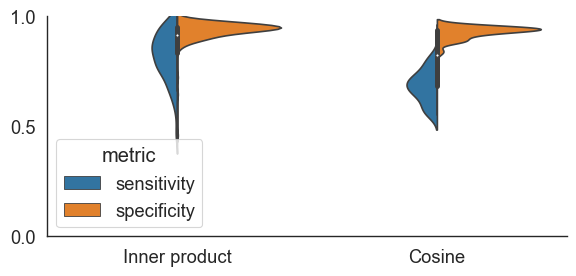

In [106]:
fig, ax = plt.subplots(figsize=(6, 3))
sb.violinplot(sb_data, x='decoder', y='value', hue='metric', inner='box', split=True)
ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1.])
ax.set_xlabel(None)
ax.set_ylabel(None)
sb.despine()
plt.tight_layout()
plt.savefig(f'../paper/figs/{graph}_decoder_comparison_tpr_tnr_{model}_{explainer}.png')

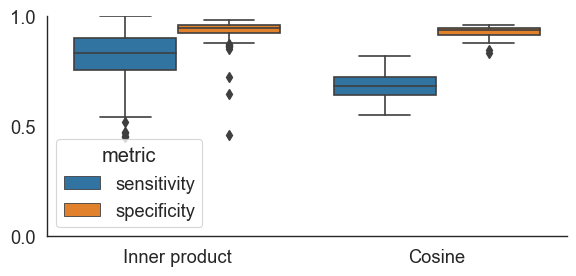

In [107]:
fig, ax = plt.subplots(figsize=(6, 3))
sb.boxplot(sb_data, x='decoder', y='value', hue='metric')
ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1.])
ax.set_xlabel(None)
ax.set_ylabel(None)
sb.despine()
plt.tight_layout()
plt.savefig(f'../paper/figs/{graph}_decoder_comparison_tpr_tnr_{model}_{explainer}.png')

# explainer comparison

## VGAE

### WS

In [27]:
data = []
model = 'vgae'
graph = 'ws'
for explainer in ['gnnexplainer', 'ig', 'deconvolution', 'backprop']:
    seed = 0
    path = f"../outputs/{graph}/{model}/{explainer}/"
    for filename in os.listdir(path):
        if not filename.startswith('.') and not filename in ['old', 'masks']:
            if filename.split('_')[-3] == 'inner':
                df = pd.read_csv(osp.join(path, filename), index_col=0)
                df['model'] = model.upper()
                df['explainer'] = explainer
                data.append(df)

In [28]:
data = pd.concat(data)

In [29]:
data.shape

(8000, 17)

In [30]:
data.head()

,idx,target,pred,source_node,target_node,tpr,tnr,binary_threshold,seed,graph,N,k,p,test_auc,model,explainer,decoder
0,0,1.0,0.711059,207,209,1.0,0.454545,0.5,6,ws,500,4,0.001,0.9289,VGAE,gnnexplainer,inner
1,1,1.0,0.698841,224,226,1.0,0.300000,0.5,6,ws,500,4,0.001,0.9289,VGAE,gnnexplainer,inner
2,2,1.0,0.682773,121,123,1.0,0.400000,0.5,6,ws,500,4,0.001,0.9289,VGAE,gnnexplainer,inner
3,3,1.0,0.667774,488,490,1.0,0.500000,0.5,6,ws,500,4,0.001,0.9289,VGAE,gnnexplainer,inner
4,4,1.0,0.697948,353,354,1.0,0.727273,0.5,6,ws,500,4,0.001,0.9289,VGAE,gnnexplainer,inner


In [31]:
model_perfomance = (data[['test_auc', 'explainer', 'seed']]
 .groupby(['explainer', 'seed'])
 .apply(lambda x: x.iloc[0])
 .test_auc
 .unstack('explainer')
)

In [32]:
model_perfomance

explainer,backprop,deconvolution,gnnexplainer,ig
seed,,,,
0,0.9250,0.9250,0.9262,0.9262
1,0.9373,0.9373,0.9379,0.9379
2,0.9782,0.9782,0.9782,0.9782
3,0.9860,0.9860,0.9860,0.9860
4,0.9690,0.9690,0.9690,0.9690
5,0.9673,0.9673,0.9677,0.9673
6,0.9289,0.9288,0.9289,0.9289
7,0.9734,0.9735,0.9734,0.9734
8,0.9813,0.9813,0.9815,0.9813


In [33]:
data = data[(data.source_node-data.target_node).abs()<(4/2+1)].copy()

In [34]:
data.groupby(['seed', 'explainer']).size()

seed  explainer    
0     backprop         100
      deconvolution    100
      gnnexplainer     100
      ig               100
1     backprop          99
      deconvolution     99
      gnnexplainer      99
      ig                99
2     backprop         100
      deconvolution    100
      gnnexplainer     100
      ig               100
3     backprop         100
      deconvolution    100
      gnnexplainer     100
      ig               100
4     backprop         100
      deconvolution    100
      gnnexplainer     100
      ig               100
5     backprop         100
      deconvolution    100
      gnnexplainer     100
      ig               100
6     backprop         100
      deconvolution    100
      gnnexplainer     100
      ig               100
7     backprop          99
      deconvolution     99
      gnnexplainer      99
      ig                99
8     backprop         100
      deconvolution    100
      gnnexplainer     100
      ig               100
9     ba

In [35]:
tpr = data[['tpr', 'explainer']].copy()
tpr.columns = ['value', 'explainer']
tpr['metric'] = 'sensitivity'
tnr = data[['tnr', 'explainer']].copy()
tnr.columns = ['value', 'explainer']
tnr['metric'] = 'specificity'
sb_data = pd.concat([tpr, tnr])

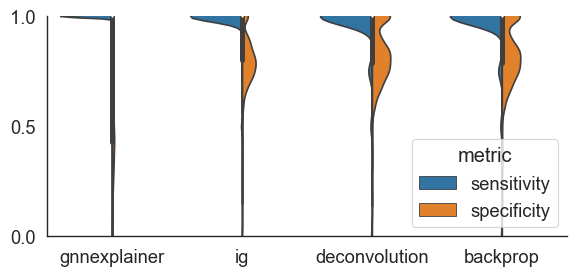

In [36]:
fig, ax = plt.subplots(figsize=(6, 3))
sb.violinplot(sb_data, x='explainer', y='value', hue='metric', inner='box', split=True)
ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1.])
ax.set_xlabel(None)
ax.set_ylabel(None)
sb.despine()
plt.tight_layout()
plt.savefig(f'../paper/figs/{graph}_explainer_comparison_tpr_tnr_{model}.png')

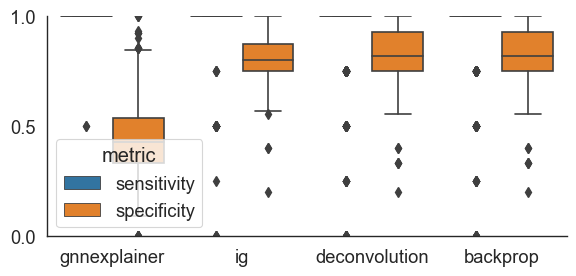

In [37]:
fig, ax = plt.subplots(figsize=(6, 3))
sb.boxplot(sb_data, x='explainer', y='value', hue='metric')
ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1.])
ax.set_xlabel(None)
ax.set_ylabel(None)
sb.despine()
plt.tight_layout()
plt.savefig(f'../paper/figs/{graph}_explainer_comparison_tpr_tnr_{model}.png')

In [38]:
data.groupby('explainer').tpr.describe()

,count,mean,std,min,25%,50%,75%,max
explainer,,,,,,,,
backprop,998.0,0.952906,0.159650,0.0,1.0,1.0,1.0,1.0
deconvolution,998.0,0.952906,0.159650,0.0,1.0,1.0,1.0,1.0
gnnexplainer,998.0,0.998998,0.022372,0.5,1.0,1.0,1.0,1.0
ig,998.0,0.985220,0.095508,0.0,1.0,1.0,1.0,1.0


In [39]:
data.groupby('explainer').tnr.describe()

,count,mean,std,min,25%,50%,75%,max
explainer,,,,,,,,
backprop,998.0,0.830202,0.125224,0.2,0.750000,0.818182,0.928571,1.0
deconvolution,998.0,0.830363,0.125287,0.2,0.750000,0.818182,0.928571,1.0
gnnexplainer,998.0,0.435887,0.154556,0.0,0.333333,0.428571,0.538462,1.0
ig,998.0,0.808211,0.103618,0.2,0.750000,0.800000,0.875000,1.0


In [40]:
data[data.explainer == 'gnnexplainer'].groupby('seed')[['tpr', 'tnr']].mean()

,tpr,tnr
seed,,
0,1.000,0.424157
1,1.000,0.447641
2,1.000,0.426023
3,1.000,0.430915
4,1.000,0.444392
5,1.000,0.442363
6,0.995,0.430697
7,1.000,0.424791
8,1.000,0.419291
